In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
 print("Size of the data :",iris_df.shape)

Size of the data : (150, 5)


In [5]:
iris_df["Species"].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [6]:
X = iris_df.drop('Species',axis=1)
y = iris_df['Species']

In [7]:
y.value_counts().index

Index(['Setosa', 'Versicolor', 'Virginica'], dtype='object', name='Species')

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size =0.2,random_state =42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
decision_tree = DecisionTreeClassifier(random_state=3)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=3)

In [15]:
predictions = decision_tree.predict(X_test)
predictions

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data :",test_accuracy)

Accuracy on test data : 1.0


In [18]:
decision_tree.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [19]:
decision_tree.feature_importances_

array([0.01667014, 0.        , 0.40593501, 0.57739485])

In [20]:
from sklearn import tree

In [21]:
tree.export_text(decision_tree)

'|--- feature_3 <= 0.80\n|   |--- class: Setosa\n|--- feature_3 >  0.80\n|   |--- feature_2 <= 4.75\n|   |   |--- feature_3 <= 1.65\n|   |   |   |--- class: Versicolor\n|   |   |--- feature_3 >  1.65\n|   |   |   |--- class: Virginica\n|   |--- feature_2 >  4.75\n|   |   |--- feature_3 <= 1.75\n|   |   |   |--- feature_2 <= 4.95\n|   |   |   |   |--- class: Versicolor\n|   |   |   |--- feature_2 >  4.95\n|   |   |   |   |--- feature_3 <= 1.55\n|   |   |   |   |   |--- class: Virginica\n|   |   |   |   |--- feature_3 >  1.55\n|   |   |   |   |   |--- feature_2 <= 5.45\n|   |   |   |   |   |   |--- class: Versicolor\n|   |   |   |   |   |--- feature_2 >  5.45\n|   |   |   |   |   |   |--- class: Virginica\n|   |   |--- feature_3 >  1.75\n|   |   |   |--- feature_2 <= 4.85\n|   |   |   |   |--- feature_0 <= 5.95\n|   |   |   |   |   |--- class: Versicolor\n|   |   |   |   |--- feature_0 >  5.95\n|   |   |   |   |   |--- class: Virginica\n|   |   |   |--- feature_2 >  4.85\n|   |   |   |  

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

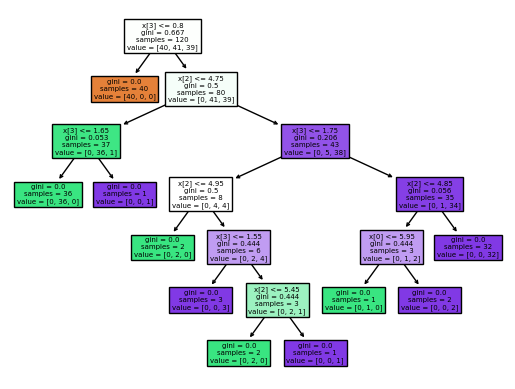

In [22]:
tree.plot_tree(decision_tree,filled=True)

In [ ]:
dot_data = tree.export_graphviz(decision_tree,feature_names = X.columns,class_names = decision_tree.classes_,
                                filled = True)

# Draw graph
graph = graphviz.Source(dot_data,format="png")
graph

In [26]:
max_depth = decision_tree.get_depth()

In [27]:
max_depth

6

## Hyperparameter Tunning

### max_depth

In [42]:
dt_clf = DecisionTreeClassifier(max_depth =2,random_state =3)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=3)

In [43]:
predictions = dt_clf.predict(X)
print("Decision Tree Accuracy :",accuracy_score(y,predictions))

Decision Tree Accuracy : 0.9533333333333334


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

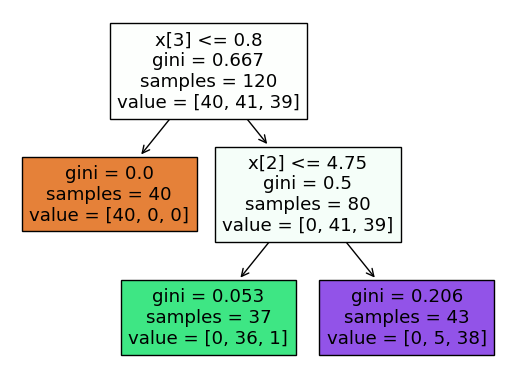

In [44]:
tree.plot_tree(dt_clf,filled=True)

In [32]:
max_depth_range = list(range(1,6))
accuracies =[]
for depth in max_depth_range:
    dt_clf = DecisionTreeClassifier(max_depth = depth,random_state = 3)
    dt_clf.fit(X,y)
    predictions = dt_clf.predict(X)
    accuracy = accuracy_score(y, predictions)
    accuracies.append(accuracy)

In [33]:
accuracies

[0.6666666666666666, 0.96, 0.9733333333333334, 0.9933333333333333, 1.0]

In [34]:
from sklearn.metrics import f1_score

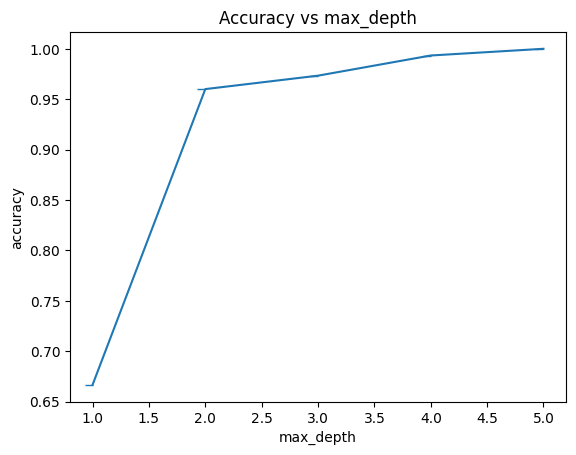

In [37]:
plt.plot(max_depth_range,accuracies,marker=0)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Accuracy vs max_depth")
plt.show()